In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# DownLoad necessary NLTK resources
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Load swiggy and zomato data
df_swiggy = pd.read_csv('swiggy.csv', encoding='utf-8')

df_zomato = pd.read_csv('zomato.csv', encoding='utf-8')



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Preprocess text
def preprocess(text):
    if isinstance(text, str):
        tokenizer = RegexpTokenizer(r'\w+')
        stop_words = set(stopwords.words('english'))
        raw = text.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [i for i in tokens if not i in stop_words]
        return stopped_tokens
    else:
        return []


In [ ]:
# Cleaned reviews for Zomato and Swiggy
zomato_cleaned_reviews = [preprocess(review) for review in df_zomato['review_description']]
swiggy_cleaned_reviews = [preprocess(review) for review in df_swiggy['review_description']]

# Create a dictionary for Zomato reviews
dictionary_zomato = corpora.Dictionary(zomato_cleaned_reviews)

# Create a corpus for Zomato reviews
corpus_zomato = [dictionary_zomato.doc2bow(text) for text in zomato_cleaned_reviews]

# Create a dictionary for Swiggy reviews
dictionary_swiggy = corpora.Dictionary(swiggy_cleaned_reviews)

# Create a corpus for Swiggy reviews
corpus_swiggy = [dictionary_swiggy.doc2bow(text) for text in swiggy_cleaned_reviews]

# Number of topics
num_topics = 5

# LDA model for Zomato reviews
lda_model_zomato = LdaModel(corpus_zomato, num_topics=num_topics, id2word=dictionary_zomato)

# LDA model for Swiggy reviews
lda_model_swiggy = LdaModel(corpus_swiggy, num_topics=num_topics, id2word=dictionary_swiggy)


In [ ]:
print("Topics for Zomato reviews:")
for idx, topic in lda_model_zomato.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topics for Zomato reviews:
Topic: 0 
Words: 0.072*"order" + 0.045*"delivery" + 0.031*"time" + 0.018*"food" + 0.015*"zomato" + 0.014*"boy" + 0.013*"delivered" + 0.013*"late" + 0.012*"deliver" + 0.010*"1"
Topic: 1 
Words: 0.036*"zomato" + 0.036*"food" + 0.022*"money" + 0.022*"app" + 0.022*"worst" + 0.021*"order" + 0.018*"bad" + 0.013*"ordered" + 0.012*"refund" + 0.010*"customer"
Topic: 2 
Words: 0.096*"good" + 0.086*"app" + 0.073*"delivery" + 0.070*"food" + 0.044*"service" + 0.036*"fast" + 0.032*"best" + 0.032*"nice" + 0.029*"zomato" + 0.017*"great"
Topic: 3 
Words: 0.064*"service" + 0.063*"customer" + 0.031*"zomato" + 0.029*"support" + 0.025*"worst" + 0.022*"bad" + 0.022*"better" + 0.021*"swiggy" + 0.017*"care" + 0.017*"poor"
Topic: 4 
Words: 0.031*"delivery" + 0.026*"charges" + 0.021*"zomato" + 0.021*"price" + 0.021*"high" + 0.016*"rs" + 0.015*"charge" + 0.015*"discount" + 0.013*"restaurant" + 0.012*"less"


In [ ]:
print("\nTopics for Swiggy reviews:")
for idx, topic in lda_model_swiggy.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topics for Swiggy reviews:
Topic: 0 
Words: 0.076*"order" + 0.023*"food" + 0.020*"swiggy" + 0.019*"delivery" + 0.016*"money" + 0.015*"ordered" + 0.012*"worst" + 0.011*"delivered" + 0.011*"1" + 0.010*"refund"
Topic: 1 
Words: 0.119*"delivery" + 0.088*"time" + 0.026*"late" + 0.021*"service" + 0.020*"deliver" + 0.018*"food" + 0.017*"location" + 0.016*"order" + 0.015*"slow" + 0.015*"boy"
Topic: 2 
Words: 0.097*"app" + 0.085*"good" + 0.072*"food" + 0.060*"delivery" + 0.037*"best" + 0.037*"service" + 0.035*"nice" + 0.025*"swiggy" + 0.024*"fast" + 0.014*"love"
Topic: 3 
Words: 0.063*"app" + 0.040*"worst" + 0.037*"swiggy" + 0.028*"zomato" + 0.021*"better" + 0.018*"service" + 0.018*"ever" + 0.013*"use" + 0.013*"please" + 0.010*"give"
Topic: 4 
Words: 0.061*"customer" + 0.039*"service" + 0.027*"bad" + 0.023*"food" + 0.021*"care" + 0.019*"support" + 0.018*"swiggy" + 0.015*"worst" + 0.012*"response" + 0.012*"poor"


In [ ]:
average_rating_zomato = df_zomato['rating'].mean()
print("Average Rating of Zomato:", average_rating_zomato)

Average Rating of Zomato: 2.968422125654569


In [ ]:
average_rating_swiggy = df_swiggy['rating'].mean()
print("Average Rating of Swiggy:", average_rating_swiggy)

Average Rating of Swiggy: 2.6729584493328886


In [ ]:
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Sentiment Analysis function
def sentiment_score(review):
    if isinstance(review, str):
        return sia.polarity_scores(review)["compound"]
    else:
        return 0.0  # Return a neutral sentiment score for NaN values

# Apply sentiment analysis to Zomato and Swiggy reviews
df_zomato['Sentiment'] = df_zomato['review_description'].apply(sentiment_score)
df_swiggy['Sentiment'] = df_swiggy['review_description'].apply(sentiment_score)

# Calculate average sentiment scores
average_zomato_sentiment = df_zomato['Sentiment'].mean()
average_swiggy_sentiment = df_swiggy['Sentiment'].mean()

# Print average sentiment scores
print(f"Average Sentiment Score for Zomato Reviews: {average_zomato_sentiment}")
print(f"Average Sentiment Score for Swiggy Reviews: {average_swiggy_sentiment}")

Average Sentiment Score for Zomato Reviews: 0.10761440070374412
Average Sentiment Score for Swiggy Reviews: 0.03254614997684159


In [ ]:
# Comparison between average sentiment scores
if average_zomato_sentiment > average_swiggy_sentiment:
    print("Zomato has a more positive average sentiment in reviews compared to Swiggy.")
elif average_zomato_sentiment < average_swiggy_sentiment:
    print("Swiggy has a more positive average sentiment in reviews compared to Zomato.")
else:
    print("Both Zomato and Swiggy have the same average sentiment in reviews.")

Zomato has a more positive average sentiment in reviews compared to Swiggy.


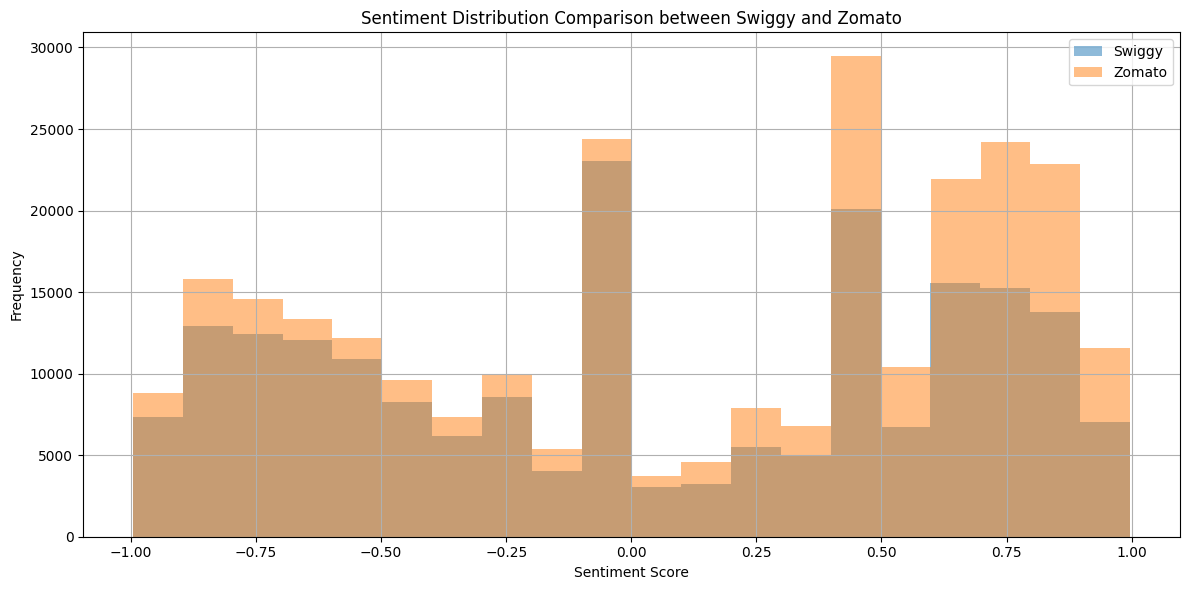

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.hist(df_swiggy['Sentiment'], bins=20, alpha=0.5, label='Swiggy')
plt.hist(df_zomato['Sentiment'], bins=20, alpha=0.5, label='Zomato')

plt.title('Sentiment Distribution Comparison between Swiggy and Zomato')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()



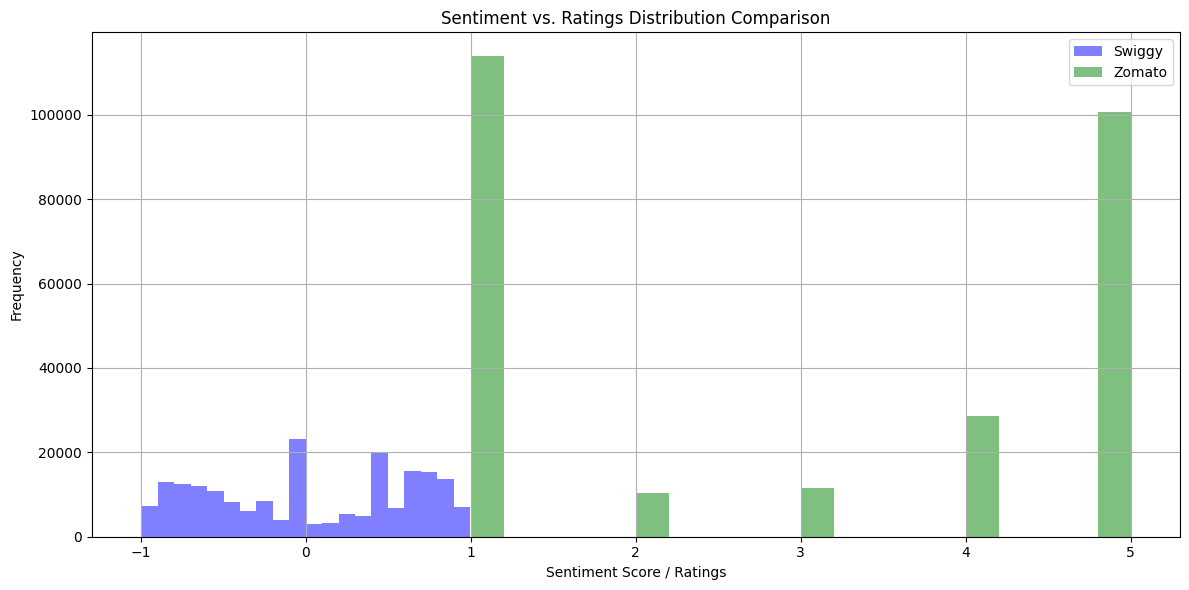

In [ ]:
import matplotlib.pyplot as plt

# Handle NaN or non-numeric values in the 'Discount' column of Swiggy dataset
#df_zomato['rating'] = pd.to_numeric(df_swiggy['rating'], errors='coerce')
#df_zomato['rating'].fillna(0.0, inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

# Plot sentiment distribution for Swiggy
plt.hist(df_swiggy['Sentiment'], bins=20, alpha=0.5, label='Swiggy', color='blue')

# Plot ratings distribution for Zomato
plt.hist(df_zomato['rating'], bins=20, alpha=0.5, label='Zomato', color='green')

plt.title('Sentiment vs. Ratings Distribution Comparison')
plt.xlabel('Sentiment Score / Ratings')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
